# High-Level Hugging Face API: **Pipeline**

**Note**: It is recommended to use Google Colab

# Initial Setup

In [ ]:
!pip install -q transformers diffusers

In [ ]:
!pip install -q -U datasets

In [ ]:
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import torch
import soundfile as sf
from google.colab import userdata
from huggingface_hub import login
from datasets import load_dataset
from transformers import pipeline
from diffusers import DiffusionPipeline
from IPython.display import Audio

In [ ]:
# Login Hugging Face
HUGGINGFACE_TOKEN = userdata.get("HF_TOKEN")
login(HUGGINGFACE_TOKEN)

# Run GPU
device = "cuda"

# Text Related Pipelines

## Sentiment Analysis

In [ ]:
classifier = pipeline(task="sentiment-analysis", device=device)
result = classifier("My lunch libre was barely palatable because the meat was so salty that I could barely eat it inside the taco and not at all on its own.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


[{'label': 'NEGATIVE', 'score': 0.9991773962974548}]


## Named Entity Recognition

Subfield of Natural Language Processing (NLP) that identifies and classifies named entities in text.

In [ ]:
ner = pipeline(task="ner", grouped_entities=True, device=device)
result = ner("Bali packs a lot into one small island— from breathtaking waterfalls like Sekumpul in the north to the white sand beaches of Nyang Nyang in the south.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'LOC', 'score': np.float32(0.99885106), 'word': 'Bali', 'start': 0, 'end': 4}, {'entity_group': 'LOC', 'score': np.float32(0.9757746), 'word': 'Sekumpul', 'start': 74, 'end': 82}, {'entity_group': 'LOC', 'score': np.float32(0.9896466), 'word': 'Nyang Nyang', 'start': 125, 'end': 136}]


## Question Answering with Context

In [ ]:
qa = pipeline(task="question-answering", device=device)
result = qa(
    question="Where is sekumpul waterfall?",
    context="Bali packs a lot into one small island— from breathtaking waterfalls like Sekumpul in the north to the white sand beaches of Nyang Nyang in the south."
)

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.6285256147384644, 'start': 90, 'end': 95, 'answer': 'north'}


## Text Summarization

In [ ]:
summarizer = pipeline(task="summarization", device=device)
text = """The Republic of Indonesia is a country in Southeast Asia and Oceania. The country stretches 5,200 km along the equator between Australia and Asia and is bordered by the Pacific and Indian Oceans at the Equator. Indonesia comprises of almost 17,000 islands, with a population of around 275 million people from more than 300 ethnic groups speaking 200 distinct languages and dialects. The Indonesian population exhibit incredible diversity in its linguistic, cultural and religious traditions. It is the world’s fourth most populous country.
With a fascinating, colorful and sometimes tumultuous past, Indonesia is a place of rich and diverse culture. Through economical, political and social advancements, Indonesia embraces its role as a major regional and international influence in this globalized age. We open our arms to our friends all around and learn from each others’ strengths. Truly, wonderful Indonesia is is a 'Home of Diversity'."""

summary = summarizer(
    text,
    max_length=50,
    min_length=25,
    do_sample=False
)

print(summary[0]["summary_text"])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 The Republic of Indonesia is a country in Southeast Asia and Oceania . The country stretches 5,200 km along the equator between Australia and Asia and is bordered by the Pacific and Indian Oceans at the Equator . Indonesia


## Translation

In [ ]:
translator = pipeline(task="translation_en_to_fr", device=device)
result = translator("Truly, wonderful Indonesia is is a 'Home of Diversity'")

print(result[0]["translation_text"])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


L'Indonésie est véritablement une "Cathédrale de la diversité"


## Classification

In [ ]:
classifier = pipeline(task="zero-shot-classification", device=device)

text = """In Indonesia, "MBG" stands for Makan Bergizi Gratis, which translates to "Free Nutritious Meal".
This program, initiated by the Indonesian government, aims to provide free, nutritious meals to various populations, including schoolchildren, pregnant women, and breastfeeding mothers."""

result = classifier(
    text,
    candidate_labels = ["sports", "technology", "politics", "education"]
)

print(f"{result['sequence']}\n")
print(result["labels"], result["scores"])

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


In Indonesia, "MBG" stands for Makan Bergizi Gratis, which translates to "Free Nutritious Meal".
This program, initiated by the Indonesian government, aims to provide free, nutritious meals to various populations, including schoolchildren, pregnant women, and breastfeeding mothers.

['education', 'technology', 'politics', 'sports'] [0.29893290996551514, 0.2845270037651062, 0.27903226017951965, 0.137507826089859]


## Text Generation

In [ ]:
generator = pipeline(task="text-generation", device=device)
result = generator("Once upon a time in Indonesia rural village")
print(result[0]["generated_text"])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time in Indonesia rural village Thema is living without a family for four months, with only five sons and three daughters working as gardeners. The village, which is at the heart of the country's rural economy, was once the nexus


# Multimodal Pipelines

## Image Generation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

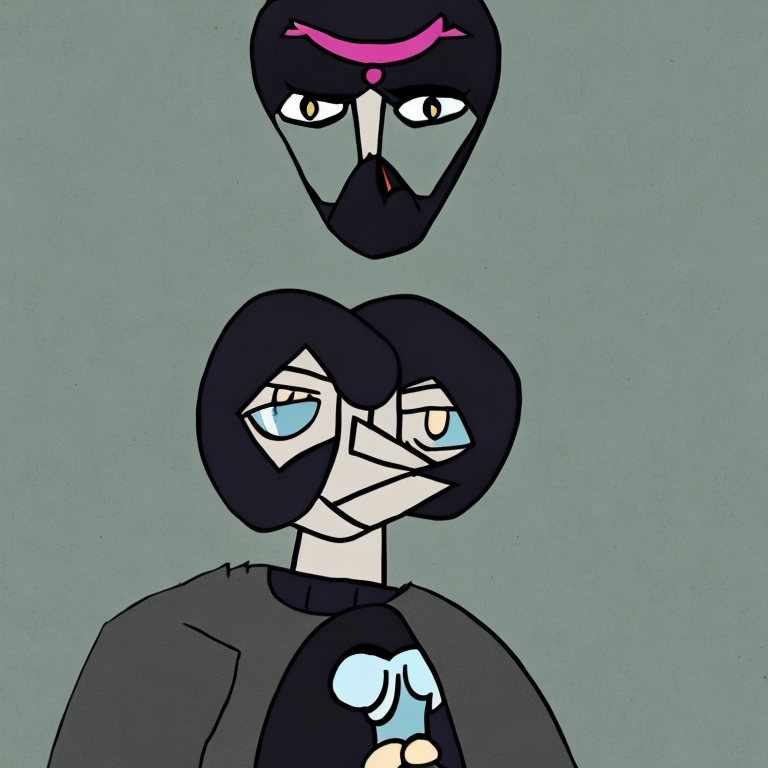

In [ ]:
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
).to(device)

text = "A murder of crows, in cartoon network style"

image = image_gen(prompt=text).images[0]
image

## Audio Generation

Need to install ffmpeg

In [ ]:
# Synthesizer
synthesizer = pipeline(
    task="text-to-speech",
    model="microsoft/speecht5_tts",
    device=device
)

# Prepare data
embedding_dataset = load_dataset(
    path="Matthijs/cmu-arctic-xvectors",
    split="validation",
    cache_dir="/content/hf_cache"
)

speaker_embedding = torch.tensor(embedding_dataset[7306]["xvector"]).unsqueeze(0)

# Generate speech
speech = synthesizer(
    "Hello! I am Siri and I am an Apple assistant",
    forward_params={"speaker_embeddings": speaker_embedding}
)

# Save and play
sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda
